<h1>Lasso-Regression anhand Glassdoor Gehaltsdatensatz 2020 </h1>
Es wird der Datensatz <code>salary_data_cleaned.csv</code> verwendet. Dieser beeinhaltet die Gehalts, und Jobinformationsdaten der Website Glassdoor für Amerika. Der Datensatz beeinhaltet Daten aus dem Jahr 2000. Der originale Datensatz wurde auf der Website https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor/data gefunden und heruntergeladen. Die .zip Datei beeinhaltet 3 csv Dateien.

In [176]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

Im Verlauf der Datensichtung schneidet pandas / Jupyter ab einer bestimmten Größe den Output ab. Dies erfolgt auch in der Texteditor Ansicht. Aus diesem Grund folgt der untenstehende Code ausgeführt.

In [177]:
# Zeilen und Spalten unbegrenzt anzeigen
pd.set_option('display.max_rows', None)  # Keine Begrenzung der Zeilen
pd.set_option('display.max_columns', None)  # Keine Begrenzung der Spalten
# Warnungen unterdrücken
warnings.filterwarnings("ignore")

<h2>Einspielen des Datensatzen</h2>

In [178]:
# Datei laden
file_path = 'salary_data_cleaned.csv'  # Ersetze dies mit deinem Pfad
data = pd.read_csv(file_path)

<h2> Datensichtung </h2>
Um herauszufinden, in welchem Maße die Datenbereinigung stattfinden muss.

<code> data.info() </code> ermöglicht uns einzusehen, welche Datentypen in welcher Spalte verwendet worden sind. <be>
<code> data.head() </code> zeigt uns die Kopfzeilen des Datensatzes, dies ermöglicht bereits einen ersten Einblick in den Aufbau der Daten. <br>
Anschließend sehen wir uns die Wertverteilung innerhalb des Data Frames genauer an.

In [179]:
# Datei sichten
data.info()

print(data.head())

# Sichtung der Spalten
## Anzahl der Wertaufkommen pro Spalte
for col in data.columns:
    print(data[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [180]:
#Sichtung der Size Spalte um zu sehen welchen Umfang die Mitarbeitergröße hat und wie viele Werte fehlen
data['Size'].value_counts()


Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: count, dtype: int64

In [181]:
# 11 fehlende Werte bei Rating (mit -1.0 bewertet), werden im Nachfolgenden auf 2.5 gesetzt! Achtung, kleine Verzerrung!
data['Rating'].value_counts()

Rating
 3.9    63
 3.7    61
 3.8    61
 3.5    49
 4.0    47
 3.6    46
 3.4    44
 3.3    39
 3.2    35
 4.4    33
 4.3    32
 4.7    31
 4.2    26
 3.1    25
 4.1    19
 2.9    18
 3.0    17
 2.7    14
 2.6    12
-1.0    11
 4.6    10
 4.8     9
 4.5     7
 2.8     7
 2.4     7
 2.1     5
 5.0     5
 1.9     3
 2.3     2
 2.5     2
 2.2     2
Name: count, dtype: int64

Im Rating werden alle Werte die -1 als Bewertung haben, durch das Durchschnittsrating ersetzt.

In [182]:
# 50 fehlende Werte für das Gründungsjahr. Gründungsjahr wird auf mean Jahr festgelegt
data['Founded'].value_counts()

Founded
-1       50
 2010    32
 2008    31
 1996    27
 2006    24
 2012    21
 2011    19
 1984    18
 1958    18
 2002    18
 2007    18
 2015    16
 2013    15
 1781    14
 1875    14
 1851    14
 1997    14
 2014    13
 1999    12
 1965    12
 2017    12
 2000    10
 2005    10
 1935    10
 2003    10
 1912    10
 1982     9
 1981     9
 1913     9
 1961     9
 1995     8
 1977     8
 1976     8
 1989     8
 1939     8
 1968     8
 1969     8
 1849     7
 1992     7
 1988     7
 1948     6
 2004     6
 1986     6
 2009     6
 1993     6
 1870     6
 1973     5
 1852     5
 1967     5
 2016     5
 1966     5
 1964     4
 1925     4
 1915     4
 1994     4
 1830     4
 1991     4
 1972     3
 1863     3
 1998     3
 1922     3
 1943     3
 1947     3
 1970     3
 1990     3
 2001     3
 1978     3
 1885     3
 1937     3
 1952     2
 2019     2
 1974     2
 1962     2
 1954     2
 1856     2
 1983     2
 1987     2
 1846     2
 1928     2
 1980     2
 1975     2
 1951     2
 1985   

In [183]:
# Es fehlen zu viele Werte in der Revenue Spalte als das wir sie verwenden können, daher droppen wir sie.
data['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: count, dtype: int64

In [184]:
# Detailliertere Sichtung
## Kopfspalten anzeigen
print(data['Size'].value_counts())

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: count, dtype: int64


In [185]:
# 50 fehlende Werte wird auf mean Age festgelegt
data['age'].value_counts()

age
-1      50
 10     32
 12     31
 24     27
 14     24
 8      21
 9      19
 36     18
 62     18
 18     18
 13     18
 5      16
 7      15
 239    14
 145    14
 169    14
 23     14
 6      13
 21     12
 55     12
 3      12
 20     10
 15     10
 85     10
 17     10
 108    10
 38      9
 39      9
 107     9
 59      9
 25      8
 43      8
 44      8
 31      8
 81      8
 52      8
 51      8
 171     7
 28      7
 32      7
 72      6
 16      6
 34      6
 11      6
 27      6
 150     6
 47      5
 168     5
 53      5
 4       5
 54      5
 56      4
 95      4
 105     4
 26      4
 190     4
 29      4
 48      3
 157     3
 22      3
 98      3
 77      3
 73      3
 50      3
 30      3
 19      3
 42      3
 135     3
 83      3
 68      2
 1       2
 46      2
 58      2
 66      2
 164     2
 37      2
 33      2
 174     2
 92      2
 40      2
 45      2
 69      2
 35      1
 93      1
 78      1
 160     1
 75      1
 49      1
 142     1
 276     1
 90   

<h2> Konklusion Datensichtung </h2>
Wir konnten bereits erkennen, dass einiges an Arbeit in das Data Frame investiert werden muss. Einige Spalten sind doppelt, Gehaltsdaten sind nicht einheitlich angegeben und können One-Hot-Encoded werden. Fehlende Daten wurden nicht mit <code> 0 </code> oder <code> NaN </code> angegeben sondern mit <code> -1 </code>. <br>
Die Jobbezeichnungen sind teilweise nicht einheitlich, und werden aus diesem Grund zusammengefasst. Doppelte Spalten werden gelöscht, Gehaltsdaten werden in Mindestgehalt, Maximalgehalt und Durchschnittsgehalt aufgeteilt. Stundenlöhne werden in Jahresgehälter umgerechnet. <br>


<h2>Datenbereinigung</h2>
In diesem Abschnitt werden die bereits erwähnten Spalten bearbeitet. Die Spalten Size, Rating und Founded sind nicht so komplex, als dass sie eigene Funktionen benötigen. 

In [186]:
# 10 fehlende Size Angaben, Zeilen werden gedroppt, da wir keine verlässliche Methode kenne, um die Mitarbeiterzahlen adäquat zu berechnen oder zu schätzen
data = data[~((data['Size'] == 'Unknown') | (data['Size'] == '-1'))]
data['Size'].value_counts()

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Name: count, dtype: int64

In [187]:
# Replace -1 in 'Rating' with the mean
data['Rating'] = data['Rating'].replace(-1, data[data['Rating'] != -1]['Rating'].mean())

In [188]:
# Berechnung des Jahres, indem der Datensatz exportiert wurde (Quick n Dirty)
dataset_export_year = data['Founded'] + data['age']


# Replace -1 in 'Founded' with the mean founded year of known companies
mean_founded_year = data[data['Founded'] != -1]['Founded'].mean()
data['Founded'] = data['Founded'].replace(-1, mean_founded_year)

# Calculate 'Age' as the difference between the export year and 'Founded'
data['age'] = dataset_export_year[0] - data['Founded']

# Ergebnis überprüfen
data['age'].value_counts()

age
50.030347     40
10.000000     32
12.000000     31
24.000000     27
14.000000     24
8.000000      21
9.000000      19
36.000000     18
62.000000     18
18.000000     18
13.000000     18
5.000000      16
7.000000      15
239.000000    14
145.000000    14
169.000000    14
23.000000     14
6.000000      13
21.000000     12
55.000000     12
3.000000      12
20.000000     10
15.000000     10
85.000000     10
17.000000     10
108.000000    10
38.000000      9
39.000000      9
107.000000     9
59.000000      9
25.000000      8
43.000000      8
44.000000      8
31.000000      8
81.000000      8
52.000000      8
51.000000      8
171.000000     7
28.000000      7
32.000000      7
72.000000      6
16.000000      6
34.000000      6
11.000000      6
27.000000      6
150.000000     6
47.000000      5
168.000000     5
53.000000      5
4.000000       5
54.000000      5
56.000000      4
95.000000      4
105.000000     4
26.000000      4
190.000000     4
29.000000      4
48.000000      3
157.000000

In der Spalte Company Name enthält der Unternehmensname nebenbei noch das Rating. Wir löschen daher das Rating und etwaige Sonderzeichen aus der Spalte.

In [189]:
# Datenbereinigung
## Bereinigung durch Löschen des Ratings aus dem Unternehmensnamen
data['Company Name'] = data['Company Name'].str.replace(r'\n\d+(\.\d+)?', '', regex=True)

<h3>Funktionen für Salary, Job Title und Size um diese Aufzuteilen</h3>
Die Funktionen wurden jeweils mit Hilfe von ChatGPT erstellt.

<h4>Funktion process_salary_data</h4>
Die Spalte 'Salary Estimate' enthält Gehaltsspannen. Diese sind jeweilig immer in einem Rahmen angegeben. Ebenso finden sich hier nicht nur Jahresgehälter sondern auch Stundengehälter. Die Funktion nutzt regex um alle Strings der Gehaltsdaten abzuschneiden, das Jahresgehalt in Floats umzuwandeln, in zwei Spalten aufzuteilen, Min_Salary_Estimate und Max_Salary_Estimate, sofern es sich um Jahresgehälter handelt. <br>
Stundengehälter werden nach dem String 'per hour' oder 'hourly' gefunden. Die Werte werden anschließend auf ein Jahresgehalt hochgerechnet. <br>
Final wird das Durchschnittsgehalt berechnet und alle drei Ergebnisse zurückgegeben. Diese werden anschließend ins Data Frame übernommen.

In [190]:
# Funktion zur Verarbeitung der Gehaltsdaten
def process_salary_data(df):
    # Verarbeitet die Gehaltsdaten in der Spalte 'Salary Estimate'.
    # Extrahiert Mindest-, Höchst- und Durchschnittsgehälter und konvertiert Stundensätze in Jahressätze.
    
    def parse_salary(salary):
        # Prüfen, ob der Eintrag "pro Stunde" ist
        is_hourly = 'per hour' in salary.lower() or 'hourly' in salary.lower()
        
        # Entfernen von irrelevanten Texten
        salary_cleaned = re.sub(r'\(.*?\)|per hour|hourly', '', salary, flags=re.IGNORECASE).strip()
        
        # Extrahieren von Gehaltszahlen
        match = re.findall(r'\d+', salary_cleaned)
        
        if len(match) >= 2:
            min_salary = int(match[0]) * (1000 if 'k' in salary.lower() else 1)
            max_salary = int(match[1]) * (1000 if 'k' in salary.lower() else 1)
        elif len(match) == 1:
            min_salary = max_salary = int(match[0]) * (1000 if 'k' in salary.lower() else 1)
        else:
            return None, None, None
        
        avg_salary = (min_salary + max_salary) / 2
        
        # Konvertieren von Stundensätzen in Jahressätze
        if is_hourly:
            min_salary *= 2080
            max_salary *= 2080
            avg_salary *= 2080
        
        return min_salary, max_salary, avg_salary

    # Verarbeitung der Spalte 'Salary Estimate'
    df[['Min Salary Estimate', 'Max Salary Estimate', 'Avg Salary Estimate']] = df['Salary Estimate'].apply(
        lambda x: pd.Series(parse_salary(x) if isinstance(x, str) else (None, None, None))
    )
    
    return df

<h4> Funktion clean_job_title </h4>
Die Spalte 'Job Title' enthält eine Vielzahl von Jobbezeichnungen. Einige davon sind spezialisierte Berufsbezeichnungen für den "selben" Job. Mit der nachfolgenden Funktion wandeln wir diese Berufe in eine einheitliche Berufsbezeichnung um. Alle Berufe die nicht zuordenbar sind werden unter 'Other' / Andere festgehalten.

In [191]:

# Funktion zur Optimierung der Spalte Job Title
def clean_job_title(job_title):
    # Standardisiert und kategorisiert Jobtitel.
    job_title = job_title.lower()  # Kleinbuchstaben
    job_title = job_title.strip()  # Leerzeichen entfernen
    
    # Standardisierung mit Regex und Keywords
    if 'data scientist' in job_title:
        return 'Data Scientist'
    elif 'data analyst' in job_title:
        return 'Data Analyst'
    elif 'machine learning' in job_title or 'ml engineer' in job_title:
        return 'Machine Learning Engineer'
    elif 'deep learning' in job_title or 'ai engineer' in job_title:
        return 'AI Engineer'
    elif 'data engineer' in job_title:
        return 'Data Engineer'
    elif 'business intelligence' in job_title or 'bi analyst' in job_title:
        return 'Business Intelligence Analyst'
    elif 'software engineer' in job_title:
        return 'Software Engineer'
    else:
        return 'Other'

<h4>Funktion process_size_with_categories</h4>
Die Spalte 'Size' enthält auch eine 'range' an Mitarbeiterzahlen. Diese splitten wir in mindest Mitarbeiterzahlen und maximal Mitarbeiterzahlen.

In [192]:

def process_size_with_categories(df):
    """
    Splits the 'Size' column into 'Min Employees' and 'Max Employees'.
    Caps the maximum value at 15,000 instead of allowing infinite values.
    """
    def parse_size(size):
        if pd.isna(size) or size == 'Unknown':
            return np.nan, np.nan  # Skip missing or unknown values
        elif '+' in size:  # Handle cases like '10000+'
            min_employees = int(re.search(r'\d+', size).group())
            max_employees = 15000  # Cap the maximum value at 15,000
            return min_employees, max_employees
        else:
            # Split ranges like '51-200'
            match = re.findall(r'\d+', size)
            if len(match) == 2:
                return int(match[0]), int(match[1])
            return np.nan, np.nan

    # Apply the parsing function
    df[['Min Employees', 'Max Employees']] = df['Size'].apply(
        lambda x: pd.Series(parse_size(x))
    )
    
    return df

Umsetzung der Funktionen:

In [193]:
data = process_salary_data(data)
data['Job Title'] = data['Job Title'].apply(clean_job_title)
data['Job Title'].value_counts()

Job Title
Data Scientist                   276
Other                            211
Data Engineer                    119
Data Analyst                      99
Machine Learning Engineer         22
Software Engineer                  4
Business Intelligence Analyst      1
Name: count, dtype: int64

In [194]:
data[['City', 'State']] = data['Location'].str.split(',', expand=True, n=1)
data['City'] = data['City'].str.strip()
data['State'] = data['State'].str.strip()

In [195]:
# Size aufspalten
data = process_size_with_categories(data)
print(data['Max Employees'].value_counts())

Max Employees
5000     150
1000     134
15000    130
500      117
200       94
10000     76
50        31
Name: count, dtype: int64


In [196]:
# Alle Spalten droppen, die keine Verwendung finden. Teilweise redundand, teilweise berechnet oder aufgespalten worden
## Salary Estimate, Size wurden gespalten
## Revenue, Job Description wurde gedroppt da nicht verwendbar
## Competitor, employer_provided, Headquarters, Location, Type of Ownership, company_txt und same_state haben wir ausgesondert, da die Daten keinen 
## erkennbaren Zusammenhang mit dem Gehalt haben.
data = data.drop(
    columns=[
        'Salary Estimate', 'Job Description', 'company_txt', 
        'same_state', 'min_salary', 'max_salary', 
        'avg_salary', 'employer_provided', 'hourly'
        ])


In [197]:
# Geänderte Daten anzeigen
print(data.head())

        Job Title  Rating                           Company Name  \
0  Data Scientist     3.8                      Tecolote Research   
1  Data Scientist     3.4  University of Maryland Medical System   
2  Data Scientist     4.8                                KnowBe4   
3  Data Scientist     3.8                                   PNNL   
4  Data Scientist     2.9                     Affinity Solutions   

          Location    Headquarters                    Size  Founded  \
0  Albuquerque, NM      Goleta, CA   501 to 1000 employees   1973.0   
1    Linthicum, MD   Baltimore, MD        10000+ employees   1984.0   
2   Clearwater, FL  Clearwater, FL   501 to 1000 employees   2010.0   
3     Richland, WA    Richland, WA  1001 to 5000 employees   1965.0   
4     New York, NY    New York, NY     51 to 200 employees   1998.0   

    Type of ownership                          Industry  \
0   Company - Private               Aerospace & Defense   
1  Other Organization  Health Care Services & 

<h2>Normalisierung</h2>
Kategorische Spalten: Industry, Sector, job_state, City, State, Company Name, Job Title
Numerische Spalten: Rating, Founded, age, python_yn, R_yn, spark, aws, excel, Min Salary Estimate, Max Salary Estimate, Avg Salary Estimate, Min Employees, Max Employees

In [198]:
# Beispiel-DataFrame

# 1. NaN und fehlende Werte
missing_values = data.isna().sum()
print("--- MISSING VALUES ---")
print(missing_values[missing_values > 0], "\n")

# 2. Unendliche Werte
infinite_values = data.select_dtypes(include=[np.number]).apply(lambda col: np.isinf(col).sum())
print("--- INFINITE VALUES ---")
print(infinite_values[infinite_values > 0], "\n")

# 3. Ausreißer (IQR-Methode)
print("--- OUTLIERS ---")
for col in data.select_dtypes(include=[np.number]).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"{col}: {outliers} outliers")

--- MISSING VALUES ---
Series([], dtype: int64) 

--- INFINITE VALUES ---
Series([], dtype: int64) 

--- OUTLIERS ---
Rating: 10 outliers
Founded: 82 outliers
age: 82 outliers
R_yn: 2 outliers
spark: 167 outliers
aws: 174 outliers
Min Salary Estimate: 18 outliers
Max Salary Estimate: 8 outliers
Avg Salary Estimate: 11 outliers


In [199]:
# Um falsche prediction auszuschließen
data = data.drop(columns=['Max Salary Estimate', 'Min Salary Estimate'])
# Alle relevanten numerischen Spalten
numeric_columns = [
    "Rating", "Founded", "age", 
    "python_yn", "R_yn", "spark", 
    "aws", "excel", "Avg Salary Estimate", 
    "Min Employees", 'Max Employees'
    ]
# Alle relevanten kategorischen Spalten
categorical_columns = [
    "Industry", "Sector", "job_state", "City", "State", "Company Name", "Job Title", 
    'Size', 'Revenue', 'Competitors', 'Headquarters', 'Location', 'Type of ownership'
    ]


Datensatz mit Dummy Daten erzeugen.
Hintergrund: Die Ergebnisse verändern sich erheblich, je nachdem ob One-Hot-Encoding angewand wird, oder eine einfache Codierungsform gewählt wird. Leider reicht meine Erfahrung nicht aus, um die bessere Variante zu finden. Da beide Lösungen vor und nachteile haben, werde wir aus diesem Grund beide anwenden. So ist die One-Hot-Encoding Variante genauer (R2, MSE), jedoch die encoded Variante übersichtlicher.
<br>
Für die Berechnung würde wir tendenziell immer die Berechnung mit dem saubersten MSE und R^2 verwenden, wobei "sauber" hier... vielleicht nicht ganz richtig ist.

In [200]:
data_ohe = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

#Standardisierung um Encodierungsveränderungen auf den Datensatz auszugleichen.
scaler = StandardScaler()
data_standardized = data_ohe.copy()
data_standardized_ohe = scaler.fit_transform(data_ohe)
minmax = MinMaxScaler()
data_standardized_ohe = minmax.fit_transform(data_standardized_ohe)

In [201]:
data_no_categorial = data_ohe

y = data_no_categorial['Avg Salary Estimate']
X = data_no_categorial.drop(columns=['Avg Salary Estimate'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_values = np.logspace(-3, 2, 50)
lasso = Lasso(alpha=0.01, max_iter=10000)

cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

mean_cv_score = -np.mean(cv_scores) 
std_cv_score = np.std(cv_scores)    
print("Cross-Validation Scores (Negative MSE):", cv_scores)
print(f"Mean MSE: {mean_cv_score:.4f}")
print(f"Standard Deviation of MSE: {std_cv_score:.4f}")


Cross-Validation Scores (Negative MSE): [-1.43836695e+09 -1.84388382e+09 -3.65670670e+08 -4.00271086e+08
 -1.01766337e+09]
Mean MSE: 1013171179.0563
Standard Deviation of MSE: 577199887.3700


Cross Validierung zeigt uns an, dass eine hohe Standardabweichung über alle Folds vorhanden ist. Dies kann an unterschiedlichen Faktoren liegen, unter anderem Ausreißern. Es kann jedoch auch an der Datenqualität liegen. Zwar bestehen einige Ausreißer in den Daten, wir würde diese jedoch nicht löschen wollen sondern nun mit der Standardisierung fortfahren um eine Verfälschung der Daten zu vermeiden.

In [202]:

parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(lasso, parameters, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha, max_iter=10000, tol=0.01)
lasso.fit(X_train, y_train)
#grid_search = GridSearchCV(lasso, parameters, cv=5)
#grid_search.fit(X_train, y_train)
print("Optimaler Alpha-Wert:", grid_search.best_params_['alpha'])

Optimaler Alpha-Wert: 10


In [203]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 640064371.0298988
R2 Score: 0.6059194057662316


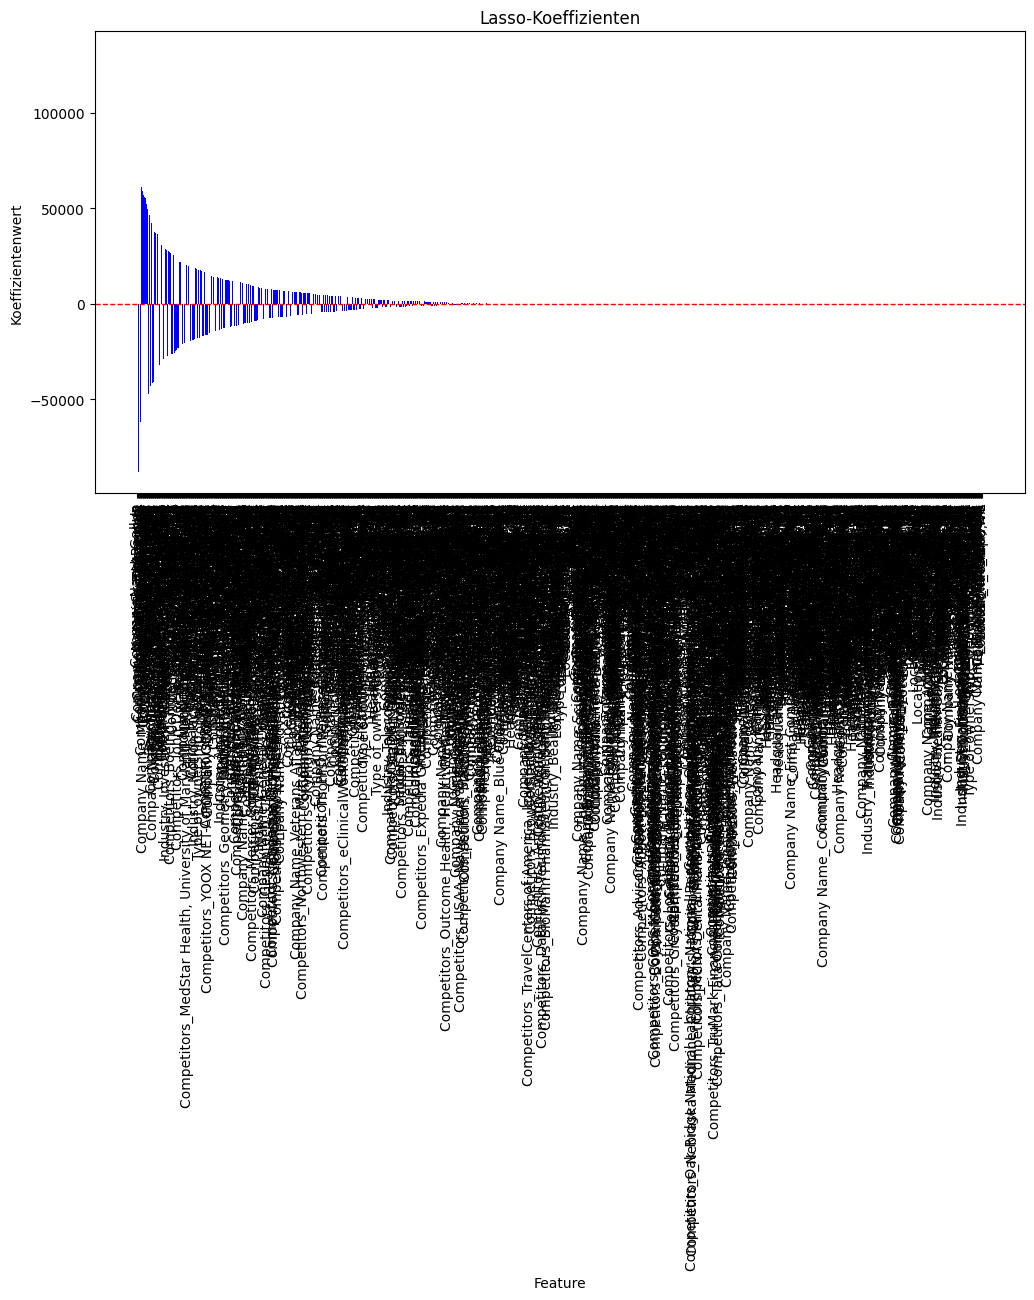

In [204]:
# Balkendiagramm der Koeffizienten
coefficients = lasso.coef_
features = X_train.columns
coef_data = pd.DataFrame({'Feature': features, "Coefficients": coefficients})
coef_data = coef_data.sort_values(by='Coefficients', key=np.abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(coef_data['Feature'], coef_data['Coefficients'], color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Lasso-Koeffizienten")
plt.xlabel("Feature")
plt.ylabel("Koeffizientenwert")
plt.xticks(rotation=90)
plt.show()

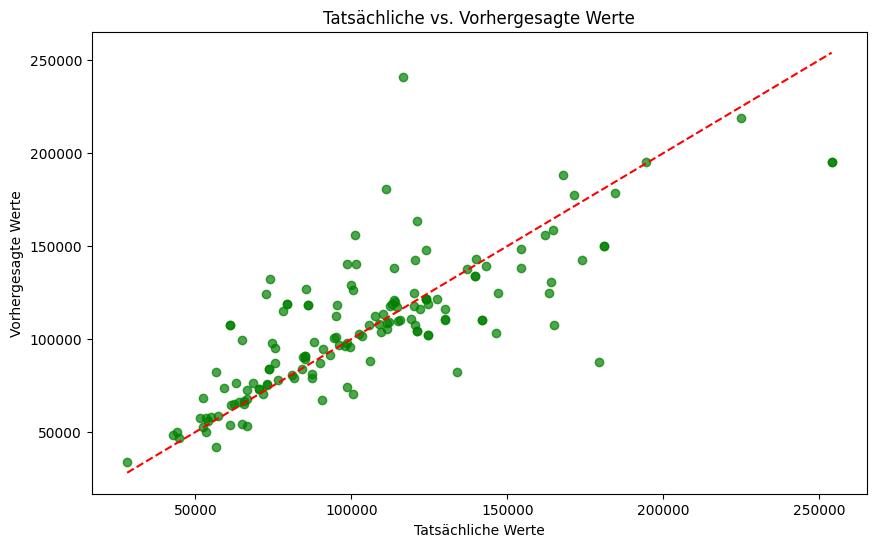

In [205]:
# 1. Vergleich: Tatsächliche vs. Vorhergesagte Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Tatsächliche vs. Vorhergesagte Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.show()

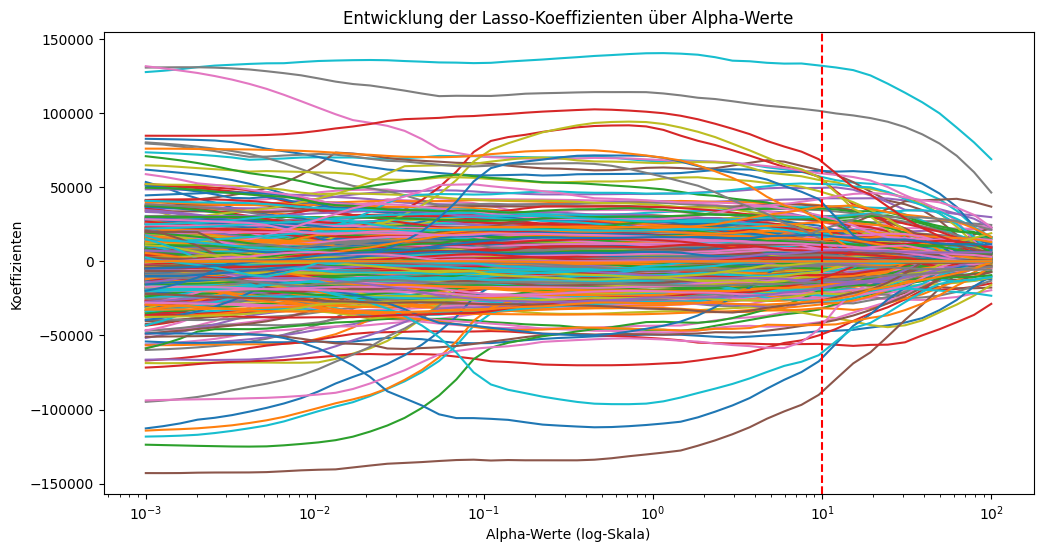

In [206]:
# 3. Entwicklung der Koeffizienten über Alpha-Werte
coefs = [] 
for a in alpha_values: 
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 6))
plt.plot(alpha_values, coefs)
plt.axvline(x=best_alpha, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel("Alpha-Werte (log-Skala)")
plt.ylabel("Koeffizienten")
plt.title("Entwicklung der Lasso-Koeffizienten über Alpha-Werte")
plt.show()

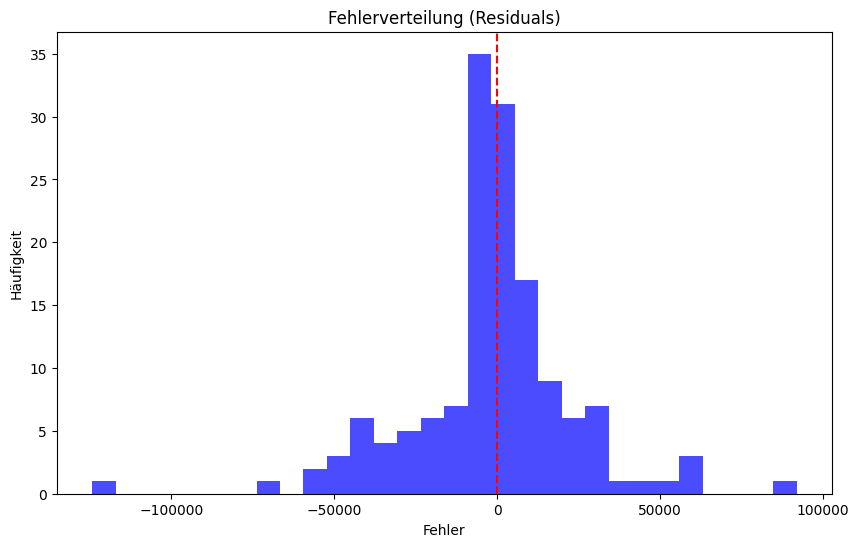

In [207]:
# 4. Fehlerverteilung
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='blue')
plt.title("Fehlerverteilung (Residuals)")
plt.xlabel("Fehler")
plt.ylabel("Häufigkeit")
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [208]:

# Identifikation Kategorischer Spalten
categorical_columns_cleaned = data.select_dtypes(include=['object']).columns.tolist()

# Irrelevante Spalten
excluded_columns_cleaned = [
    'Salary Estimate', 'Job Description', 'Competitors', 'company_txt', 'avg_salary'
]
columns_to_encode_cleaned = [col for col in categorical_columns_cleaned if col not in excluded_columns_cleaned]

# Frequenzencoding anwenden
for col in columns_to_encode_cleaned:
    frequency_cleaned = data[col].value_counts(normalize=True)
    data[f"{col}_encoded"] = data[col].map(frequency_cleaned)

# Originale Kategorische Variablen droppen
final_data = data.drop(columns=columns_to_encode_cleaned)
final_data = final_data.drop(columns='Competitors')
print(final_data)

#Standardisierung um Encodierungsveränderungen auf den Datensatz auszugleichen.
data_standardized = final_data.copy()
data[numeric_columns].info()
data_standardized = scaler.fit_transform(final_data)

#Ergebnisse ansehen
print(data_standardized)

       Rating      Founded         age  python_yn  R_yn  spark  aws  excel  \
0    3.800000  1973.000000   47.000000          1     0      0    0      1   
1    3.400000  1984.000000   36.000000          1     0      0    0      0   
2    4.800000  2010.000000   10.000000          1     0      1    0      1   
3    3.800000  1965.000000   55.000000          1     0      0    0      0   
4    2.900000  1998.000000   22.000000          1     0      0    0      1   
5    3.400000  2000.000000   20.000000          1     0      0    1      1   
6    4.100000  2008.000000   12.000000          0     0      0    0      1   
7    3.800000  2005.000000   15.000000          1     0      1    1      1   
8    3.300000  2014.000000    6.000000          0     0      0    0      0   
9    4.600000  2009.000000   11.000000          1     0      1    0      0   
10   3.500000  2011.000000    9.000000          1     0      0    0      0   
11   4.100000  1968.000000   52.000000          0     0      0  

In [209]:
data_no_categorial = final_data

y = data_no_categorial['Avg Salary Estimate']
X = data_no_categorial.drop(columns=['Avg Salary Estimate'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_values = np.logspace(-3, 2, 50)
lasso = Lasso(alpha=0.01, max_iter=10000)
#lasso.fit(X_train, y_train)
#y_pred = lasso.predict(X_test)

In [210]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(lasso, parameters, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha, max_iter=10000, tol=0.01)
lasso.fit(X_train, y_train)

cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

mean_cv_score = -np.mean(cv_scores) 
std_cv_score = np.std(cv_scores)    
print("Cross-Validation Scores (Negative MSE):", cv_scores)
print(f"Mean MSE: {mean_cv_score:.4f}")
print(f"Standard Deviation of MSE: {std_cv_score:.4f}")


Cross-Validation Scores (Negative MSE): [-8.35986047e+08 -9.64098881e+08 -1.11769529e+09 -1.06175855e+09
 -1.08451929e+09]
Mean MSE: 1012811612.0480
Standard Deviation of MSE: 102155362.5247


Gemäß Cross Validierung sollte unser vereinfachtes System "besser" sein.

In [211]:

grid_search = GridSearchCV(lasso, parameters, cv=5)
grid_search.fit(X_train, y_train)
print("Optimaler Alpha-Wert:", grid_search.best_params_['alpha'])

Optimaler Alpha-Wert: 10


In [212]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 1265316127.8835702
R2 Score: 0.22095877518132312


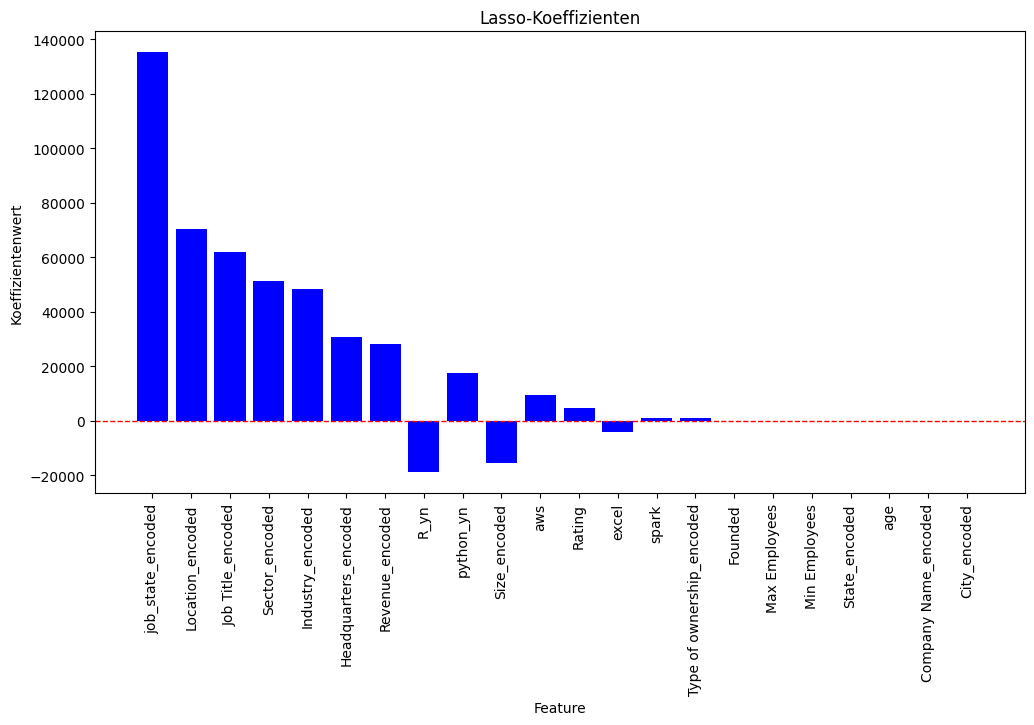

In [213]:
# Balkendiagramm der Koeffizienten
coefficients = lasso.coef_
features = X_train.columns
coef_data = pd.DataFrame({'Feature': features, "Coefficients": coefficients})
coef_data = coef_data.sort_values(by='Coefficients', key=np.abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(coef_data['Feature'], coef_data['Coefficients'], color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Lasso-Koeffizienten")
plt.xlabel("Feature")
plt.ylabel("Koeffizientenwert")
plt.xticks(rotation=90)
plt.show()

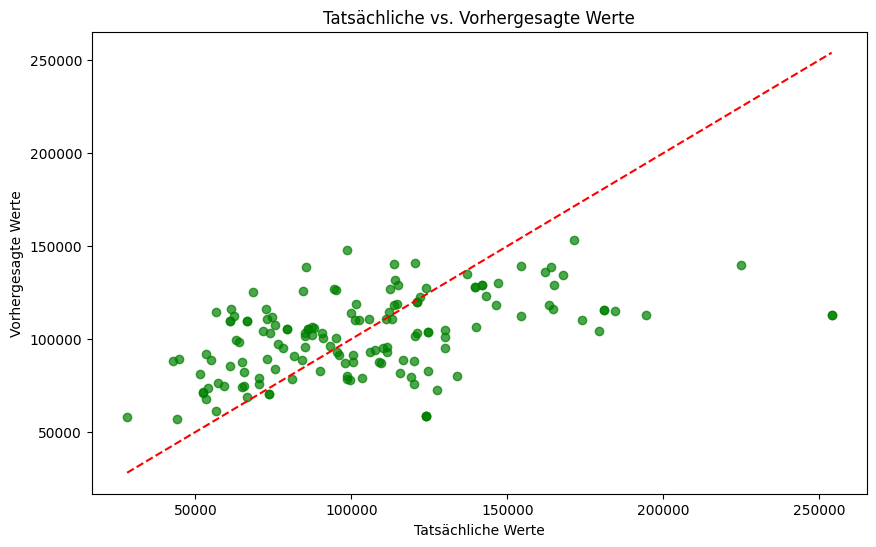

In [214]:
# 1. Vergleich: Tatsächliche vs. Vorhergesagte Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Tatsächliche vs. Vorhergesagte Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.show()

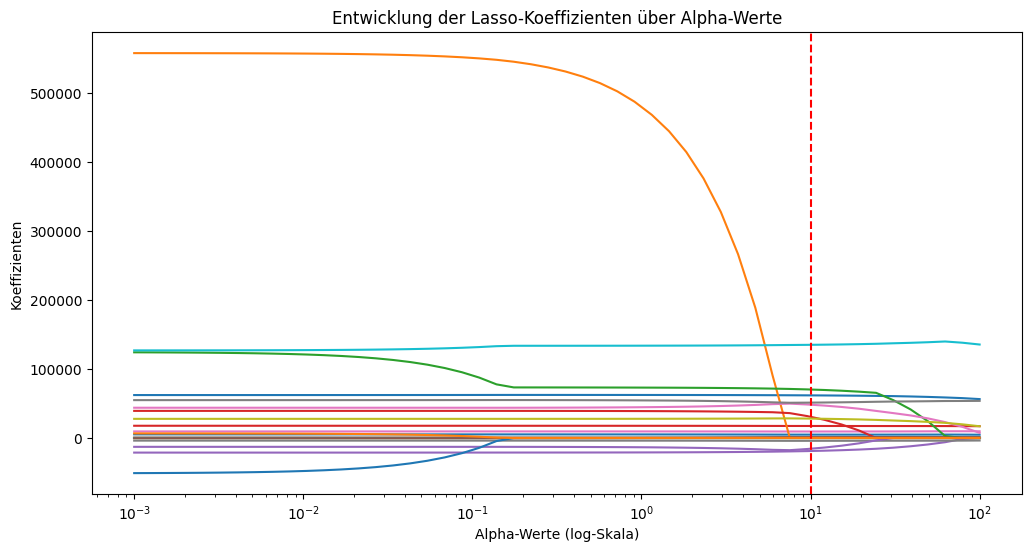

In [215]:
# 3. Entwicklung der Koeffizienten über Alpha-Werte
coefs = [] 
for a in alpha_values: 
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 6))
plt.plot(alpha_values, coefs)
plt.axvline(x=best_alpha, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel("Alpha-Werte (log-Skala)")
plt.ylabel("Koeffizienten")
plt.title("Entwicklung der Lasso-Koeffizienten über Alpha-Werte")
plt.show()

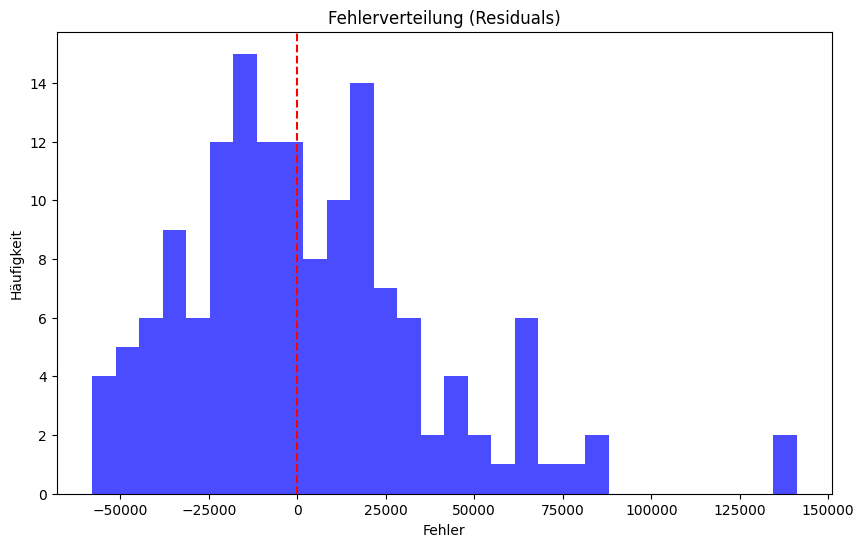

In [216]:
# 4. Fehlerverteilung
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='blue')
plt.title("Fehlerverteilung (Residuals)")
plt.xlabel("Fehler")
plt.ylabel("Häufigkeit")
plt.axvline(0, color='red', linestyle='--')
plt.show()

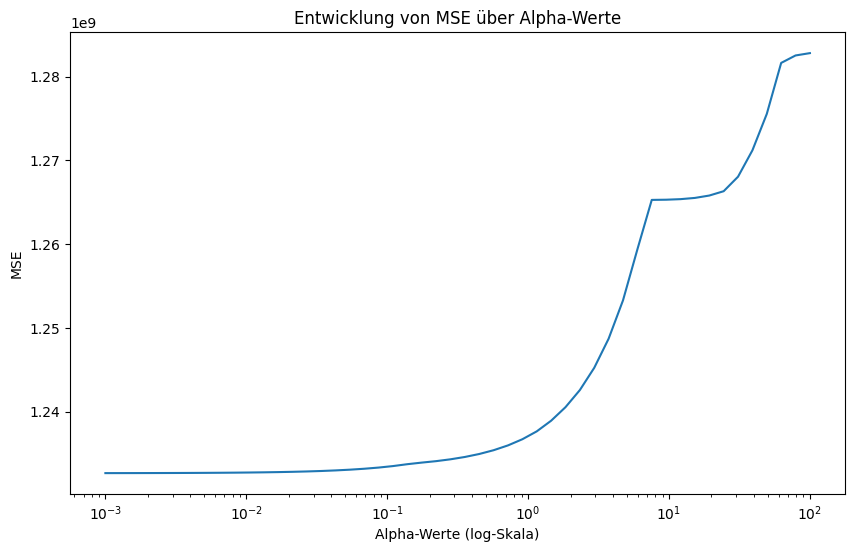

In [217]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

mse_values = []
for a in alpha_values: 
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_values)
plt.xscale('log')
plt.xlabel("Alpha-Werte (log-Skala)")
plt.ylabel("MSE")
plt.title("Entwicklung von MSE über Alpha-Werte")
plt.show()